In [ ]:
!pip install ultralytics
!pip install rasterio

In [5]:
from google.colab import drive
from ultralytics import YOLO
import matplotlib.pyplot as plt
import rasterio
import os

In [6]:
drive.mount('/content/drive')

# Define the path to your dataset and model configuration
data_path = "/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images"
config_file = "yolov8n.yaml"

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


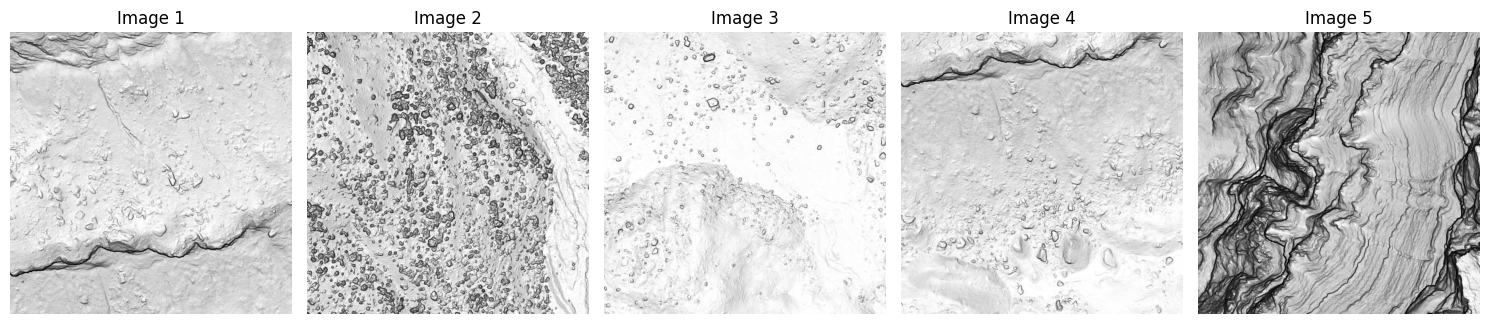

In [8]:
def display_images(data_path):
    # List all .tif files in the directory
    tif_files = [f for f in os.listdir(data_path) if f.endswith('.jpg')]

    # Ensure there are at least 5 images
    num_images = min(5, len(tif_files))
    if num_images == 0:
        print("No .jpg files found in the directory.")
        return

    # Plot the first 5 images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        file_path = os.path.join(data_path, tif_files[i])
        with rasterio.open(file_path) as src:
            image = src.read(1)  # Read the first band
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Image {i+1}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Display the images
display_images(data_path)

In [11]:
import glob
from PIL import Image
input_dir = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test'  # Replace with the folder containing .tif files
output_dir = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test'  # Replace with your desired output folder

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through all .tif files in the input directory
for tif_file in glob.glob(os.path.join(input_dir, '*.tif')):
    try:
        # Open the .tif file
        with Image.open(tif_file) as img:
            # Create the .jpg file path
            jpg_file = os.path.join(output_dir, os.path.basename(tif_file).replace('.tif', '.jpg'))

            # Convert the image to RGB and save as .jpg
            img.convert('RGB').save(jpg_file, 'JPEG')
            print(f"Converted: {tif_file} -> {jpg_file}")
    except Exception as e:
        print(f"Error converting {tif_file}: {e}")

Converted: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_0_0.tif -> /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_0_0.jpg
Converted: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_1_0.tif -> /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_1_0.jpg
Converted: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_3_2.tif -> /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_3_2.jpg
Converted: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_0_1.tif -> /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/d

In [9]:
model = YOLO(config_file)  # Load a YOLOv8 model

# Train the model
model.train(
    data="/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/dataset.yaml",          # Path to the dataset
    epochs=10,               # Number of training epochs
    imgsz=640,               # Image size for training
    batch=16,                # Batch size
    name="yolov8_hillshade", # Name of the training run
    project="yolov8_train",  # Directory to save training results
    workers=4                # Number of data loader workers
)


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=yolov8_train, name=yolov8_hillshade, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/labels.cache... 576 images, 283 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2582_1127_0_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2588_1133_0_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2588_1133_1_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2598_1132_0_3.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2598_1132_1_3.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_h

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels.cache... 64 images, 37 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]


Plotting labels to yolov8_train/yolov8_hillshade/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to yolov8_train/yolov8_hillshade
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      5.041      5.802      4.017         54        640: 100%|██████████| 36/36 [09:23<00:00, 15.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:56<00:00, 28.32s/it]

                   all         64        292          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.652      4.283       3.06         13        640: 100%|██████████| 36/36 [09:07<00:00, 15.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.87s/it]

                   all         64        292          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.932      3.611      2.522        108        640: 100%|██████████| 36/36 [09:11<00:00, 15.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.25s/it]

                   all         64        292          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.795      3.701      2.425         20        640: 100%|██████████| 36/36 [09:19<00:00, 15.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.98s/it]

                   all         64        292      0.043     0.0822     0.0114     0.0045



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.586      3.414      2.256         25        640: 100%|██████████| 36/36 [08:55<00:00, 14.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.24s/it]

                   all         64        292      0.301      0.199      0.147      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.591      3.414      2.172         80        640: 100%|██████████| 36/36 [08:52<00:00, 14.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:17<00:17, 17.87s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:33<00:00, 16.66s/it]

                   all         64        292     0.0491     0.0342    0.00703     0.0013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.425      3.054      2.049        101        640: 100%|██████████| 36/36 [09:01<00:00, 15.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.04s/it]

                   all         64        292      0.246      0.264      0.164     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G       2.33      2.879      2.015         31        640: 100%|██████████| 36/36 [09:10<00:00, 15.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:31<00:00, 15.75s/it]

                   all         64        292      0.317      0.312      0.225      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.212      2.879      1.939        101        640: 100%|██████████| 36/36 [09:26<00:00, 15.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.54s/it]

                   all         64        292      0.395      0.279      0.263      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.279      2.805      1.937         42        640: 100%|██████████| 36/36 [09:09<00:00, 15.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.60s/it]

                   all         64        292      0.381       0.26      0.229     0.0999



10 epochs completed in 1.620 hours.
Optimizer stripped from yolov8_train/yolov8_hillshade/weights/last.pt, 6.2MB
Optimizer stripped from yolov8_train/yolov8_hillshade/weights/best.pt, 6.2MB

Validating yolov8_train/yolov8_hillshade/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.60s/it]


                   all         64        292      0.395      0.279      0.263       0.12
Speed: 5.9ms preprocess, 279.4ms inference, 0.0ms loss, 18.5ms postprocess per image
Results saved to yolov8_train/yolov8_hillshade


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e03ff691840>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [13]:
results = model.predict(
    source='/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images',  # Path to test images or a single image
    save=True,                     # Save prediction images
    save_txt=True,                 # Save predictions in YOLO format
    conf=0.25,                     # Confidence threshold (adjust as needed)
    imgsz=640                      # Image size (ensure it matches your training)
)


image 1/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1126_1_2.jpg: 640x640 3 rocks, 504.7ms
image 2/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1126_3_2.jpg: 640x640 3 rocks, 327.2ms
image 3/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1127_0_2.jpg: 640x640 (no detections), 343.3ms
image 4/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1127_2_0.jpg: 640x640 (no detections), 367.8ms
image 5/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1127_2_2.jpg: 640x640 (no detections), 347.9ms
image 6/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2582_1126_1_1.jpg

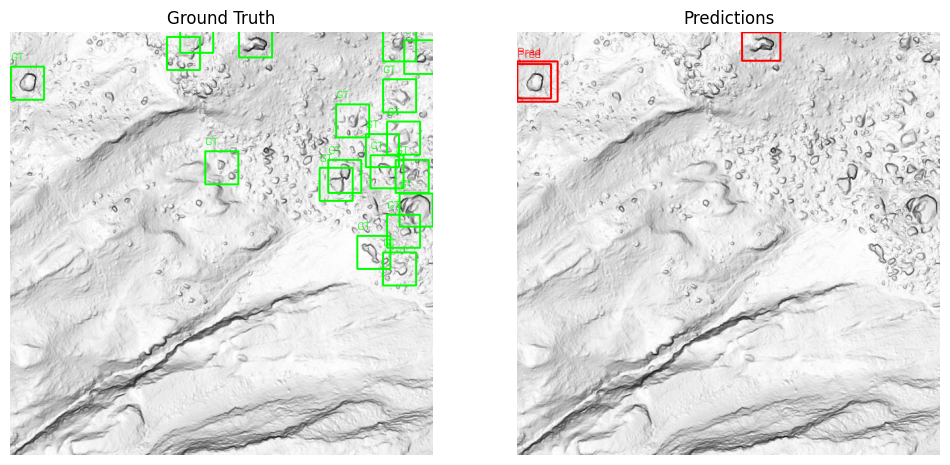

No predictions found for 2581_1127_0_2.txt


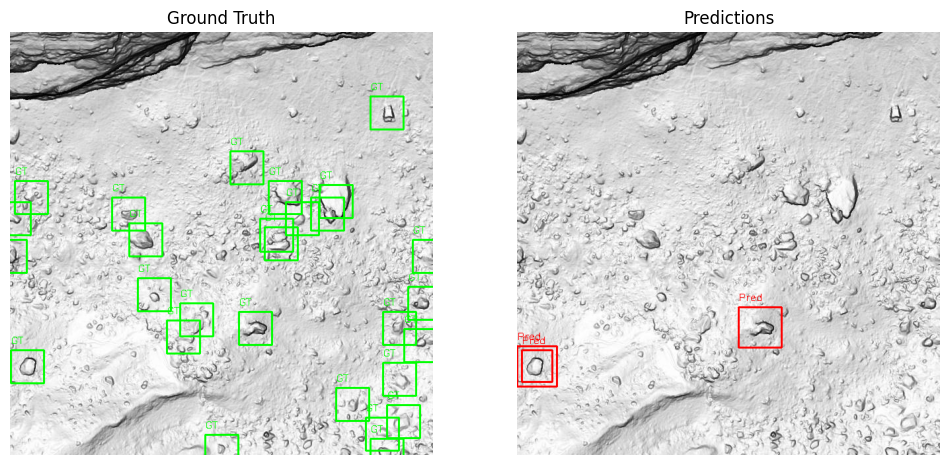

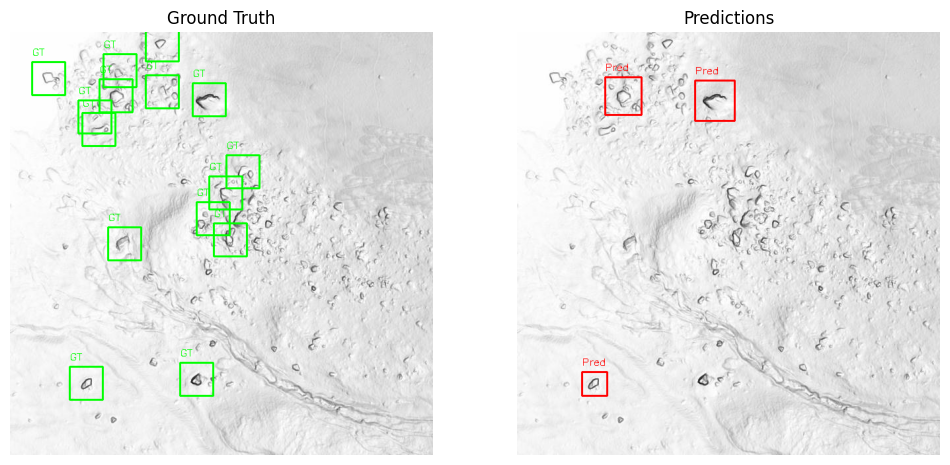

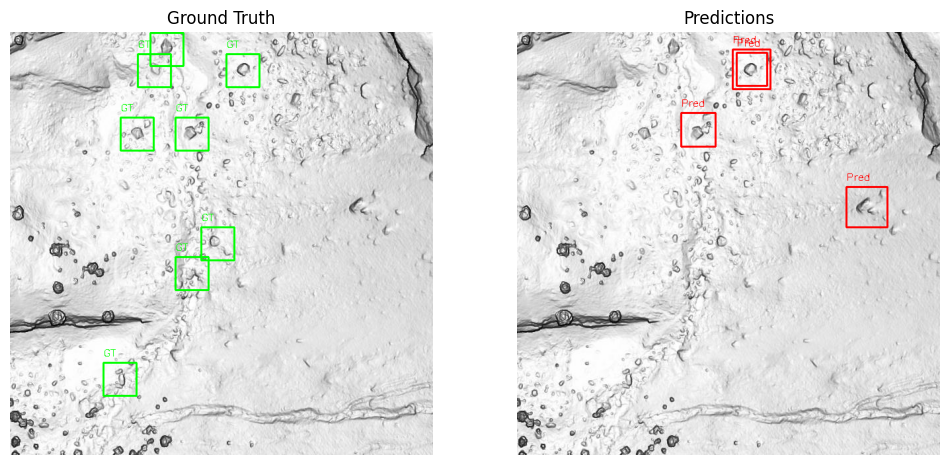

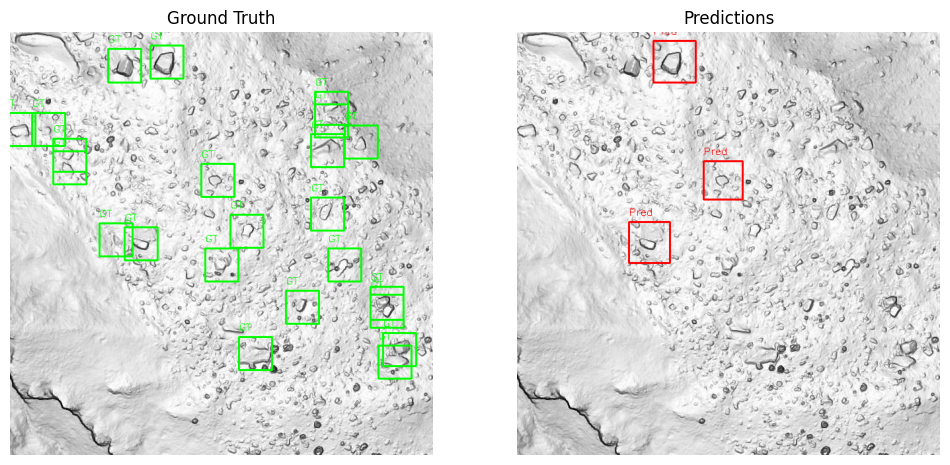

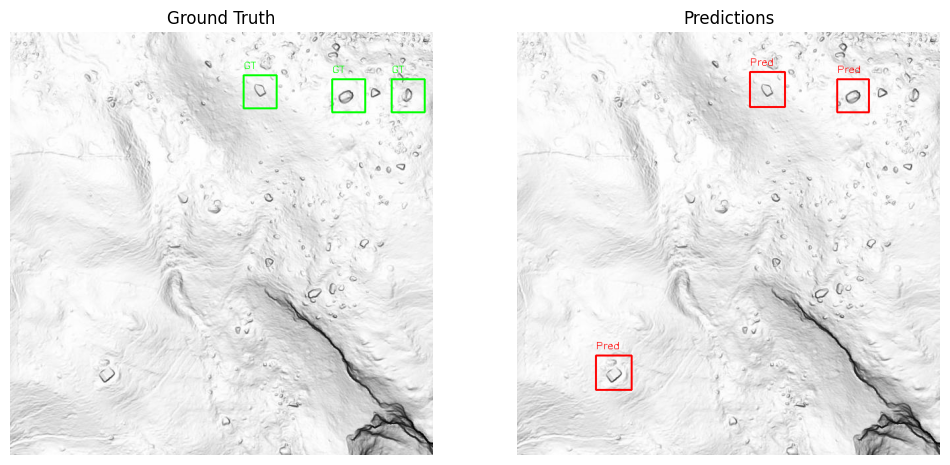

No predictions found for 2583_1127_3_3.txt


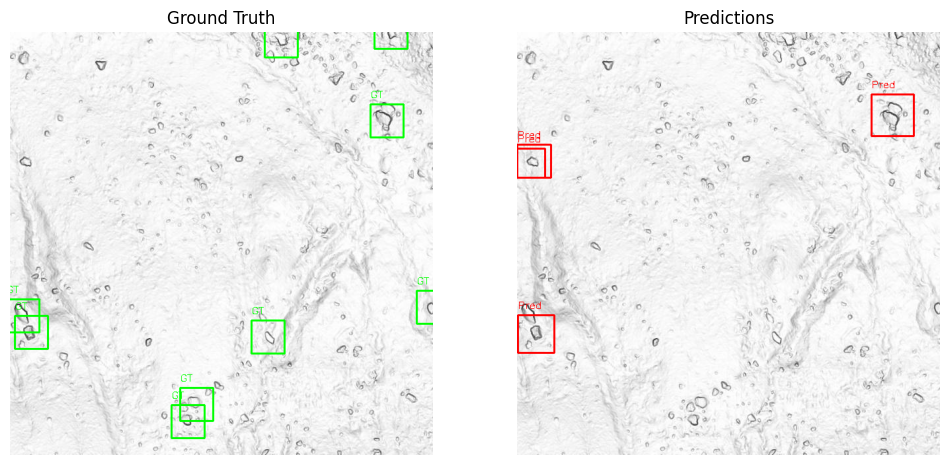

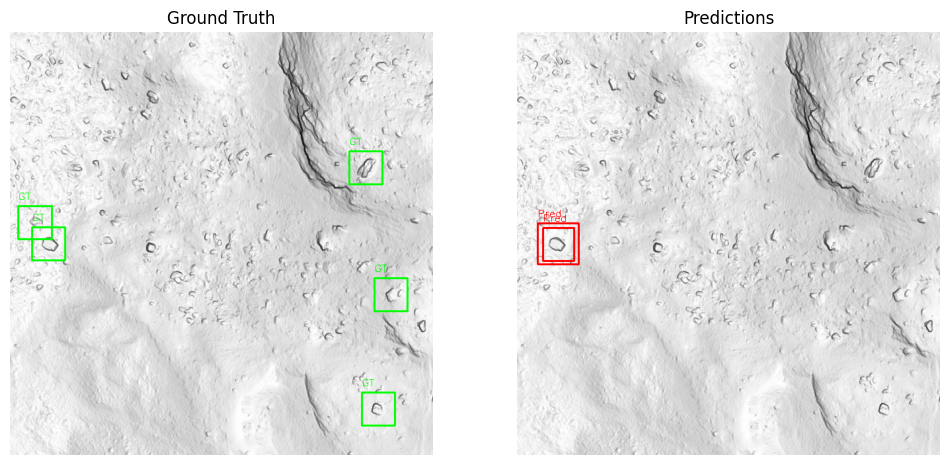

No predictions found for 2582_1126_2_2.txt
No predictions found for 2632_1144_0_0.txt


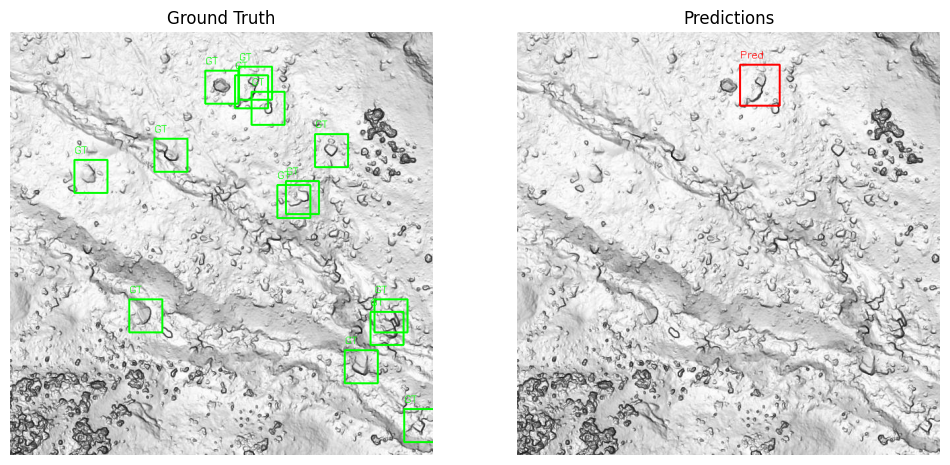

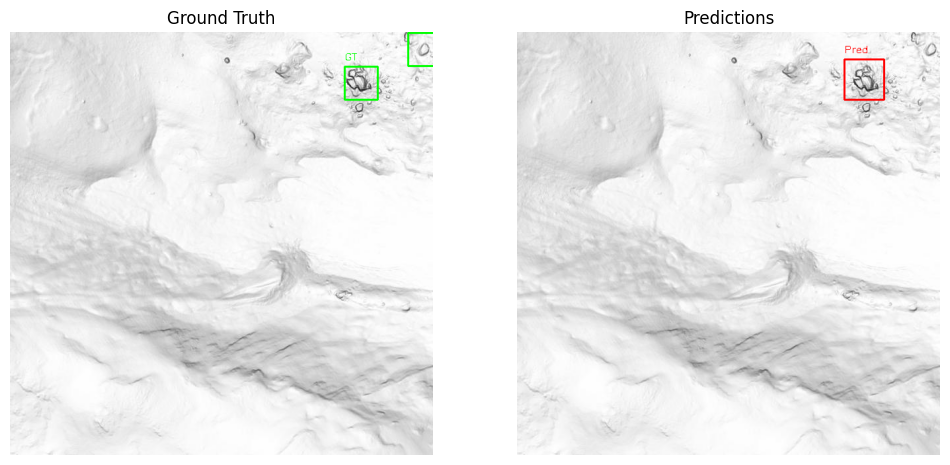

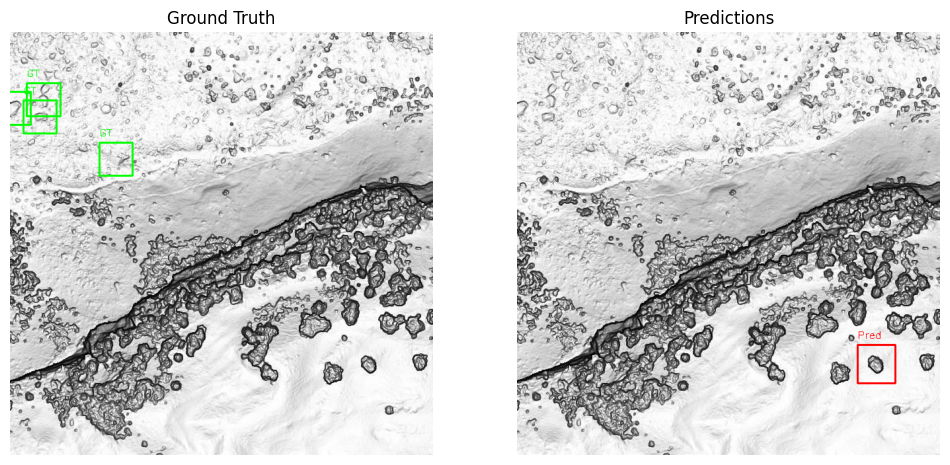

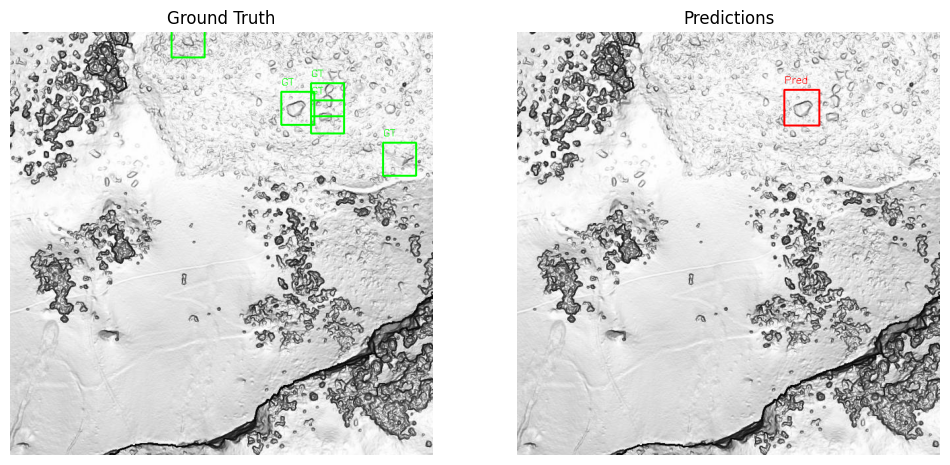

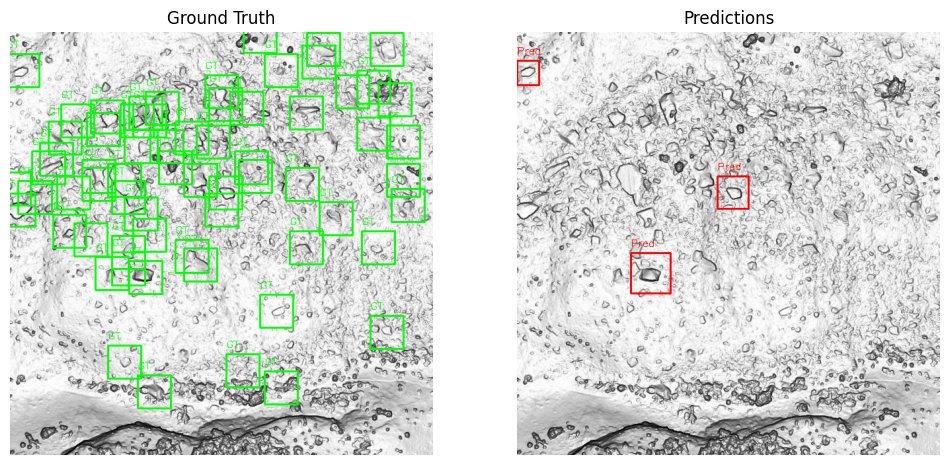

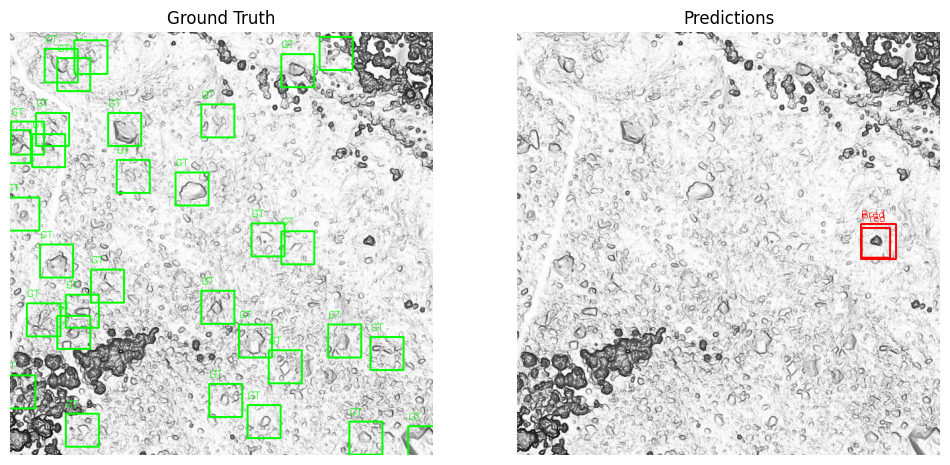

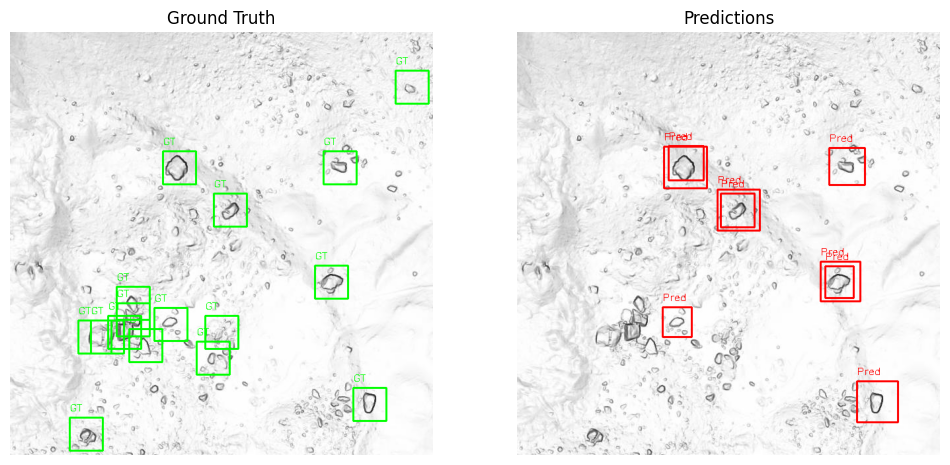

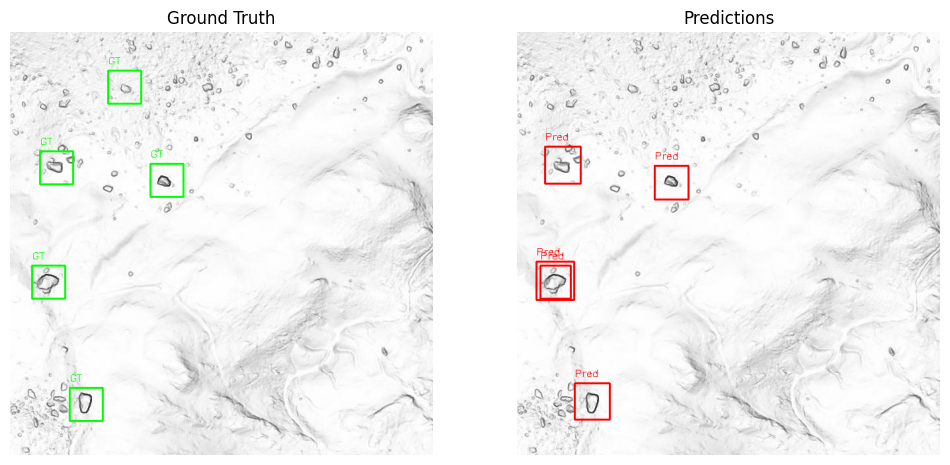

No predictions found for 2598_1131_3_3.txt


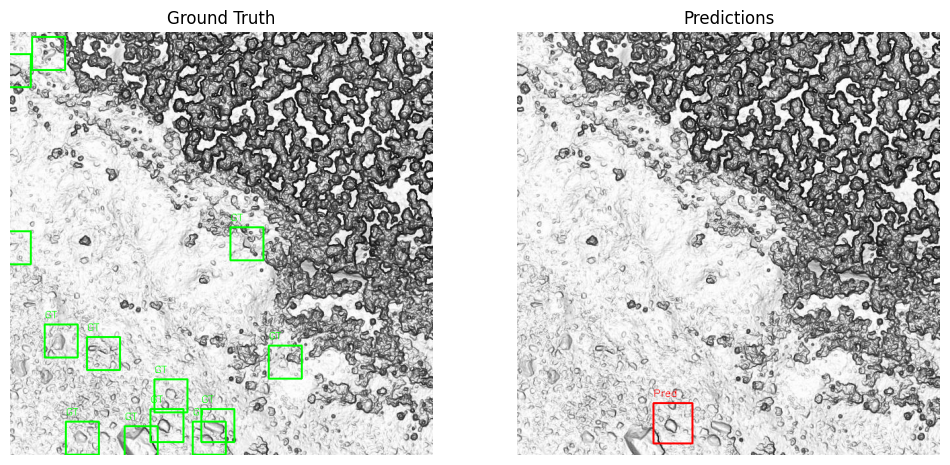

In [18]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths
val_images_path = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images'
val_labels_path = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels'
predicted_images_path = 'yolov8_train/yolov8_hillshade2'
predicted_labels_path = 'yolov8_train/yolov8_hillshade2/labels'

# Helper function to load YOLO labels
def load_yolo_labels(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    return [list(map(float, line.strip().split())) for line in lines]

# Helper function to draw bounding boxes
def draw_boxes(image, boxes, color, label_type=""):
    h, w, _ = image.shape
    for box in boxes:
        x_center, y_center, width, height = box[1:]  # YOLO format: <class_id> <x_center> <y_center> <width> <height>
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f"{label_type}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Iterate over validation set
for label_file in os.listdir(val_labels_path):
    label_path = os.path.join(val_labels_path, label_file)
    # Check if the label file contains more than one label
    labels = load_yolo_labels(label_path)
    if len(labels) > 1:
        # Load the corresponding image
        image_file = label_file.replace('.txt', '.jpg')  # Assuming images are .jpg
        image_path = os.path.join(val_images_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw ground truth boxes
        ground_truth_image = image.copy()
        draw_boxes(ground_truth_image, labels, color=(0, 255, 0), label_type="GT")  # Green for ground truth

        # Load the model's predictions
        pred_label_path = os.path.join(predicted_labels_path, label_file)
        if os.path.exists(pred_label_path):
            predictions = load_yolo_labels(pred_label_path)
            predicted_image = image.copy()
            draw_boxes(predicted_image, predictions, color=(255, 0, 0), label_type="Pred")  # Red for predictions
        else:
            print(f"No predictions found for {label_file}")
            continue

        # Plot side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(ground_truth_image)
        axes[0].set_title("Ground Truth")
        axes[0].axis('off')

        axes[1].imshow(predicted_image)
        axes[1].set_title("Predictions")
        axes[1].axis('off')

        plt.show()
